In [1]:
import numpy as np

# Assuming all_epochs and all_labels are your arrays
# Example data, replace with actual data
all_epochs = np.random.rand(72, 45, 21, 2500)
# Example labels, replace with actual data
all_labels = np.random.randint(0, 2, size=(72, 45))

# Generate a random permutation along the first axis (axis=0)
perm = np.random.permutation(72)

# Shuffle both arrays using the same permutation along the first axis
shuffled_epochs = all_epochs[perm]
shuffled_labels = all_labels[perm]

# Verify the shapes to ensure alignment is maintained
print("Shuffled epochs shape:", shuffled_epochs.shape)
print("Shuffled labels shape:", shuffled_labels.shape)

Shuffled epochs shape: (72, 45, 21, 2500)
Shuffled labels shape: (72, 45)


In [9]:
perm = np.random.permutation(72)
len(perm)

72

In [10]:
perm

array([30, 50, 69, 33, 66, 17, 44, 38, 60, 67, 59, 34, 49, 11, 42, 25, 70,
       51, 48, 45, 20, 36, 23, 52, 61, 41,  2, 16, 54, 62, 57, 21, 27, 37,
       28, 32,  6, 31,  9, 26,  1, 71, 63,  7, 56, 35,  4, 22, 24, 10, 53,
       15, 47, 65, 68, 39, 18,  0, 13,  8, 29, 58, 12, 14, 55, 64, 46, 43,
       19, 40,  3,  5])

In [12]:
shuffled_epochs = []
shuffled_labels = []

for index in perm:
    shuffled_epochs.append(all_epochs[index])
    shuffled_labels.append(all_labels[index])

In [15]:
len(all_epochs[0])

45

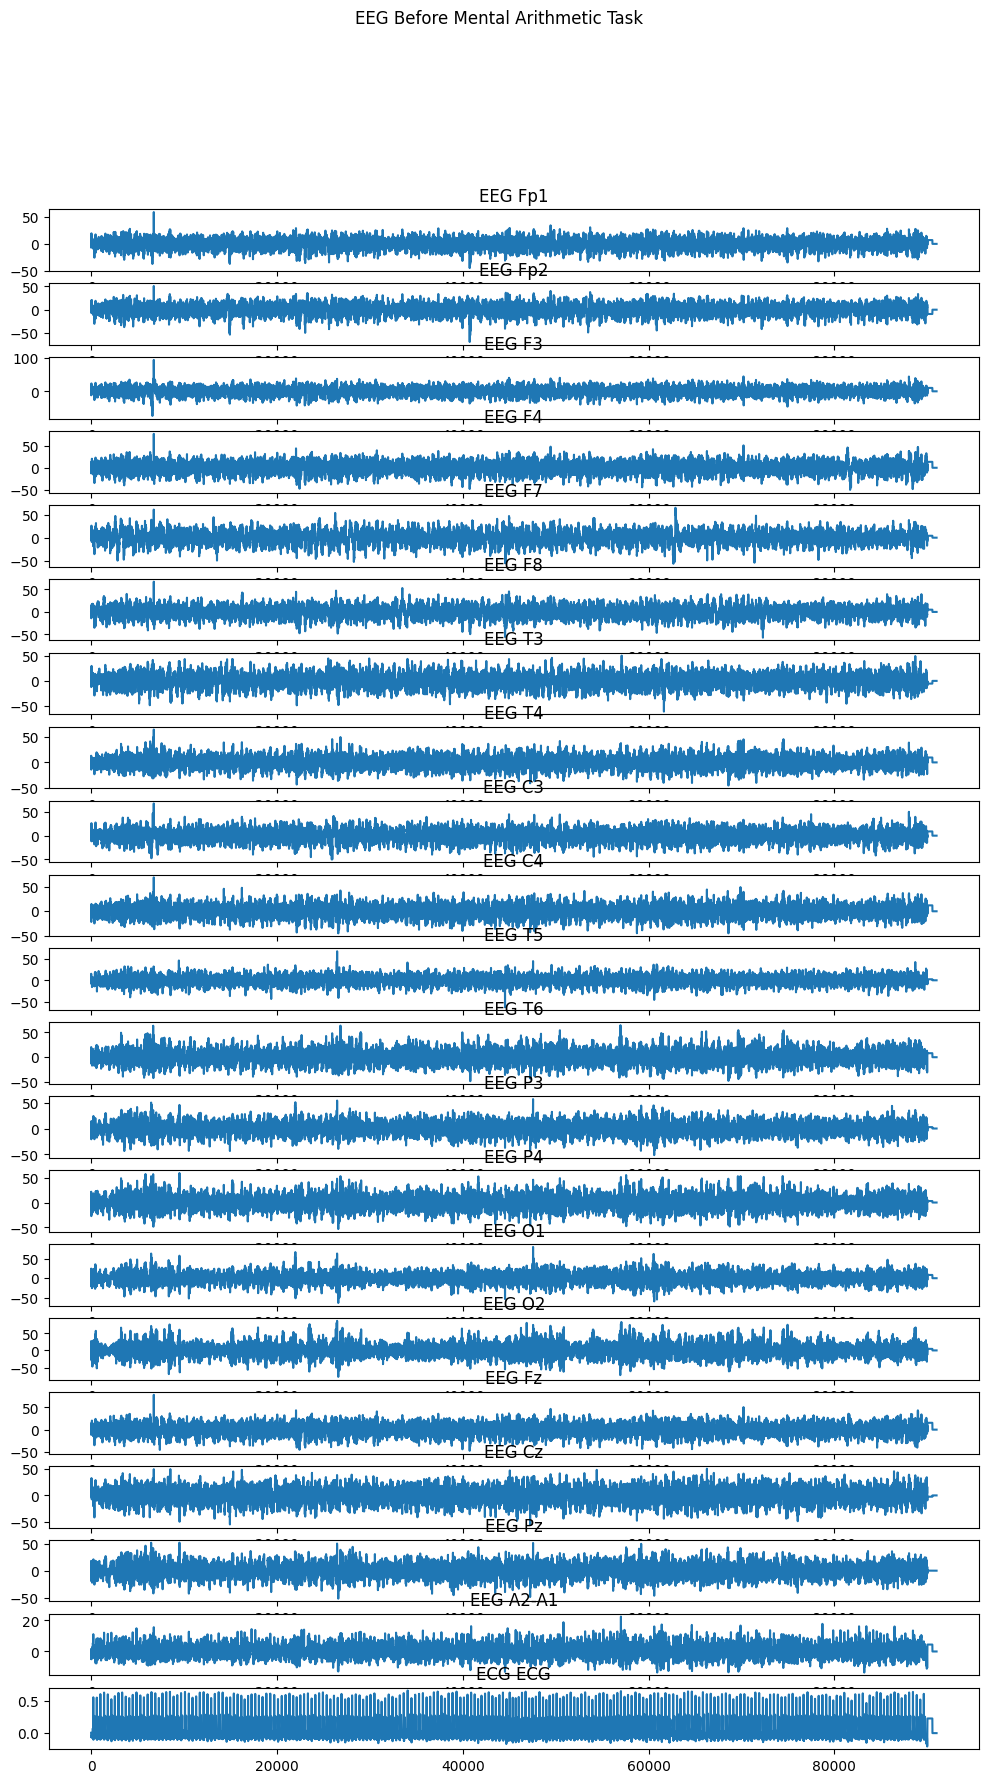

In [6]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt


def read_edf_file(file_path):
    f = pyedflib.EdfReader(file_path)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i, digital=False)
    f.close()
    return sigbufs, signal_labels


def plot_signals(signals, labels, title):
    plt.figure(figsize=(12, 20))
    for i in range(len(signals)):
        plt.subplot(len(signals), 1, i+1)
        plt.plot(signals[i])
        plt.title(labels[i])
    plt.suptitle(title)
    plt.show()


# Load the EEG data before the mental arithmetic task
signals_1, labels_1 = read_edf_file(
    './eeg-during-mental-arithmetic-tasks-1.0.0/Subject00_1.edf')
plot_signals(signals_1, labels_1, 'EEG Before Mental Arithmetic Task')

In [2]:
import pyedflib

# Function to read and display EDF file information


def read_edf_info(file_path):
    # Open the EDF file
    f = pyedflib.EdfReader(file_path)

    # Get general file information
    start_datetime = f.getStartdatetime()
    duration = f.file_duration
    n_channels = f.signals_in_file

    # Get signal information
    channel_labels = f.getSignalLabels()
    sampling_frequencies = f.getSampleFrequencies()
    physical_min = f.getPhysicalMinimum()
    physical_max = f.getPhysicalMaximum()
    digital_min = f.getDigitalMinimum()
    digital_max = f.getDigitalMaximum()

    # Read signal data (for demonstration, we print only first 10 samples of each channel)
    signal_data = []
    for i in range(n_channels):
        # Read first 10 samples for demonstration
        signal_data.append(f.readSignal(i)[:10])

    # Check for annotations/events (EDF+)
    annotations = f.readAnnotations()

    # Print general file information
    print("Start datetime:", start_datetime)
    print("File duration (seconds):", duration)
    print("Number of channels:", n_channels)
    print()

    # Print signal information
    for i in range(n_channels):
        print(f"Channel {i + 1}:")
        print(f"  Label: {channel_labels[i]}")
        print(f"  Sampling frequency: {sampling_frequencies[i]} Hz")
        print(f"  Physical min: {physical_min[i]}")
        print(f"  Physical max: {physical_max[i]}")
        print(f"  Digital min: {digital_min[i]}")
        print(f"  Digital max: {digital_max[i]}")
        print(f"  Signal data: {signal_data[i]} ...")  # Print first 10 samples
        print()

    # Print annotations/events if present
    if annotations[0].size > 0:
        print("Annotations/Events:")
        for i in range(len(annotations[0])):
            onset = annotations[0][i]
            duration = annotations[1][i]
            description = annotations[2][i]
            print(
                f"  Onset: {onset}, Duration: {duration}, Description: {description}")
    else:
        print("No annotations/events found.")

    # Close the EDF file
    f.close()


# Path to your EDF file
file_path = './eeg-during-mental-arithmetic-tasks-1.0.0/Subject00_1.edf'

# Read and display EDF file information
read_edf_info(file_path)

Start datetime: 2011-01-01 00:00:00
File duration (seconds): 182.0
Number of channels: 21

Channel 1:
  Label: EEG Fp1
  Sampling frequency: 500.0 Hz
  Physical min: -45.1698
  Physical max: 59.35658
  Digital min: -32768.0
  Digital max: 32767.0
  Signal data: [-3.64793763 -4.23648168 -4.95421832 -5.70385437 -6.37055197 -6.84744809
 -7.067554   -7.0244898  -6.76769958 -6.39128658] ...

Channel 2:
  Label: EEG Fp2
  Sampling frequency: 500.0 Hz
  Physical min: -69.2185
  Physical max: 50.76077
  Digital min: -32768.0
  Digital max: 32767.0
  Signal data: [-3.58186632 -4.27938829 -5.02084864 -5.65612455 -6.04607777 -6.12480072
 -5.90144724 -5.46938639 -4.96592565 -4.52288021] ...

Channel 3:
  Label: EEG F3
  Sampling frequency: 500.0 Hz
  Physical min: -73.6162
  Physical max: 93.88263
  Digital min: -32768.0
  Digital max: 32767.0
  Signal data: [ -4.08124663  -4.76621934  -5.78345493  -7.07928016  -8.51823403
  -9.90351465 -11.02298497 -11.71562529 -11.90475954 -11.64150511] ...

Cha